In [17]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
from yahoo_fin import stock_info as si
import pandas as pd

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

start = '2022-07-29'
end = '2023-07-29'
tickers = si.tickers_dow()

In [19]:
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
stocks_returns = np.log(dataset/dataset.shift(1))

print('\nCorrelation Matrix')
corr_matrix = stocks_returns.corr()
print (corr_matrix)

[*********************100%***********************]  30 of 30 completed

Correlation Matrix
          AAPL      AMGN       AXP        BA       CAT       CRM      CSCO  \
AAPL  1.000000  0.274561  0.587056  0.393511  0.386036  0.553657  0.601360   
AMGN  0.274561  1.000000  0.221742  0.195761  0.268563  0.141081  0.354508   
AXP   0.587056  0.221742  1.000000  0.436040  0.569088  0.443693  0.497559   
BA    0.393511  0.195761  0.436040  1.000000  0.488602  0.336271  0.375832   
CAT   0.386036  0.268563  0.569088  0.488602  1.000000  0.291509  0.449296   
CRM   0.553657  0.141081  0.443693  0.336271  0.291509  1.000000  0.417588   
CSCO  0.601360  0.354508  0.497559  0.375832  0.449296  0.417588  1.000000   
CVX   0.345206  0.189037  0.328513  0.360543  0.565839  0.267108  0.355400   
DIS   0.552693  0.211262  0.554358  0.389531  0.471621  0.494214  0.455039   
DOW   0.462086  0.279542  0.576975  0.476021  0.690316  0.318662  0.446721   
GS    0.449318  0.245944  0.605169  0.476458  0.603

In [20]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("\nTop Absolute Correlations")
print(get_top_abs_correlations(stocks_returns))



Top Absolute Correlations
KO    PG      0.727243
AAPL  MSFT    0.717773
GS    JPM     0.695394
CAT   DOW     0.690316
AXP   V       0.676406
AAPL  V       0.648306
CAT   HON     0.646209
HON   MMM     0.642585
DOW   GS      0.628604
      MMM     0.613063
KO    MCD     0.611864
HON   JPM     0.607800
HD    HON     0.607344
AXP   GS      0.605169
CAT   GS      0.603389
AAPL  INTC    0.602235
      CSCO    0.601360
GS    HON     0.600358
CSCO  IBM     0.596923
JNJ   MRK     0.595398
MCD   PG      0.591759
CSCO  HON     0.588358
AAPL  AXP     0.587056
AXP   JPM     0.580970
HON   KO      0.578513
CAT   JPM     0.577614
AXP   DOW     0.576975
AAPL  NKE     0.574508
DOW   JPM     0.573734
HD    NKE     0.572760
DIS   V       0.570323
      DOW     0.569670
AXP   CAT     0.569088
CAT   CVX     0.565839
      MMM     0.565524
HD    MMM     0.563791
AAPL  HD      0.562835
HON   MCD     0.558930
CRM   MSFT    0.555333
JPM   V       0.555193
HON   IBM     0.554796
AXP   DIS     0.554358
AMGN  J

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


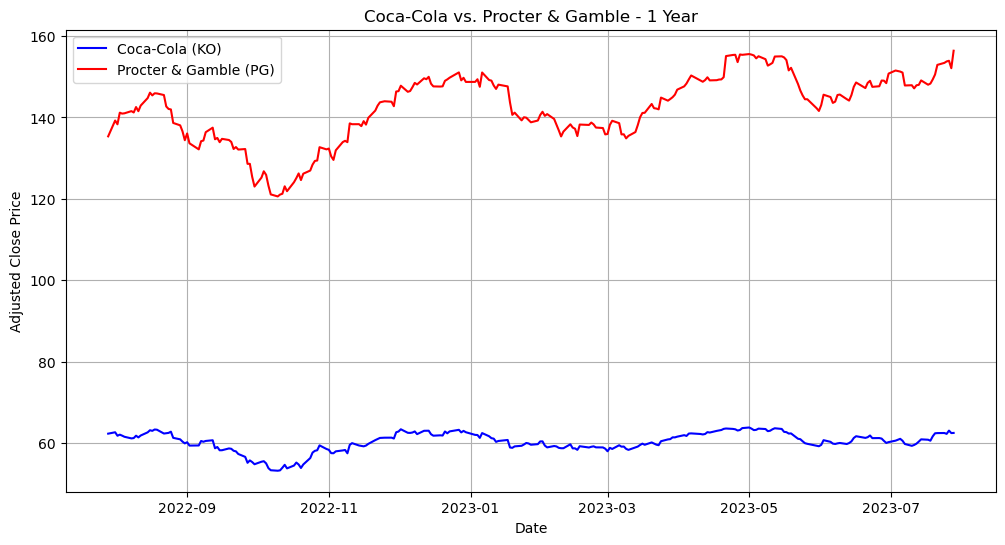

In [28]:
coca_cola_symbol = "KO"
procter_gamble_symbol = "PG"

yf.pdr_override()
coca_cola_data = pdr.get_data_yahoo(coca_cola_symbol, start, end)["Adj Close"]
procter_gamble_data = pdr.get_data_yahoo(procter_gamble_symbol, start, end)["Adj Close"]

plt.figure(figsize=(12, 6))
plt.plot(coca_cola_data.index, coca_cola_data, color='blue', label="Coca-Cola (KO)")
plt.plot(procter_gamble_data.index, procter_gamble_data, color='red', label="Procter & Gamble (PG)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Coca-Cola vs. Procter & Gamble - 1 Year")
plt.legend()
plt.grid(True)
plt.show()